<div class="alert alert-block alert-info" align=center><b></b>

# Problem Description: 


> A 10-K FInancial Report is a comprehensive report which must be filed annually by
all publicly traded companies about its financial performance.

> These reports are filed
to the US Securities Exchange Commission (SEC). This is even more detailed than
the annual report of a company.

> The 10K documents contain information about the
Business' operations, risk factors, selected financial data, the Management's
discussion and analysis (MD&A) and also Financial Statements and supplementary
data.

## 10-K reports are very important for investors where they describe about the company's potential to Succeed.
----

<div class="alert alert-block alert-info" align=center><b></b>
    
# Business Understanding

**A 10-K filing is split into 4 parts**

 - **Part 1** - Gives an overview of the business. 
 - **Part 2** - Discusses the firm's financial standing and its various securities being traded in the financial markets. 
 - **Part 3** - Contains disclosures about important company personnel and their families. 
 - **Part 4** - Contains the financial statements and exhibits (tables) that are expected to come with the 10-K.


---
**1. Business.**
> This provides an overview of the company’s main operations, including its products and services (i.e., how it makes money).


**2. Management Discussion & Analysis.(MD & A).**
>  Also known as MD&A, this gives the company an opportunity to explain its business results from the previous fiscal year. This section is where the company can tell its story in its own words.


**3. Risk factors.**
> These outline any and all risks the company faces or may face in the future. The risks are typically listed in order of importance.
-----



<div class="alert alert-block alert-info" align=center><b></b>
    
 ## As a Data Scientist

##  Resources given: 

1. ".txt" links of the companies, their filing year's & comppany "CIK" numbers.
2. Dictionary file to vectorise the text data and capturing the sentiment.

## OBJECTIVES: 

**1. Data Extraction from the EDGAR base from the given links.**

**2. Cleaning the data.**

**3. Understanding the data & Getting the meaningful Insights.**

**4. Building an robust model with validation strategy to make predictions on the long term outlook.**

**5. Model's without Using Dictionary using tf-idf.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for text

# !pip install PyDrive
# !pip install gensim
# !pip install pyldavis
# !python -m spacy download en
from nltk.corpus import stopwords
from nltk.util import ngrams

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier


from bs4 import BeautifulSoup
import requests as rq
import urllib.request as url
from bs4 import BeautifulSoup as bs

import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import gzip
import en_core_web_sm

import gensim
from gensim import corpora

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.5
matplotlib version: 3.3.3
NumPy version: 1.19.2
SciPy version: 1.6.0
IPython version: 7.19.0
scikit-learn version: 0.23.2


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hobin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: No module named 'spacy'

In [2]:
import os
import warnings;
warnings.filterwarnings("ignore");


# Visulization
import plotly
import plotly.offline as pyoff

import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [3]:

# !pip install vecstack
# !pip -q install shap
# !pip -q install lime
# !pip -q install eli5
# !pip install tpot
# !pip install hyperopt
!pip install xgboost
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import random as rnd
pd.set_option('max_colwidth',400)
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [5]:
#let's read the complete file 
all_links = pd.read_csv("10k_filing_info_train_links.csv", usecols=['ticker','cik','filing_date','link','long_term_outlook'])

FileNotFoundError: [Errno 2] No such file or directory: '10k_filing_info_train_links.csv'

In [0]:
#let's check the shape of the data

print("The number of rows are {}." .format(all_links.shape[0]))
print("The number of columns are {}." .format(all_links.shape[1]))

The number of rows are 2568.
The number of columns are 5.


In [0]:
#let's print the top5 rows of the data
all_links.head()

ticker      cik filing_date  \
0     FE  1031296  28-02-2012   
1     CL    21665  19-02-2015   
2    PRU  1137774  19-02-2016   
3   EBAY  1065088  28-03-2001   
4    CAM   941548  25-02-2005   

                                                                                          link  \
0  https://www.sec.gov/Archives/edgar/data/1031296/000103129612000012/0001031296-12-000012.txt   
1    https://www.sec.gov/Archives/edgar/data/21665/000162828015000846/0001628280-15-000846.txt   
2  https://www.sec.gov/Archives/edgar/data/1137774/000113777416000226/0001137774-16-000226.txt   
3  https://www.sec.gov/Archives/edgar/data/1065088/000109581101001836/0001095811-01-001836.txt   
4   https://www.sec.gov/Archives/edgar/data/941548/000095012905001646/0000950129-05-001646.txt   

   long_term_outlook  
0                  0  
1                  0  
2                  1  
3                  1  
4                  1

In [0]:
# let's check the data types of the file 
print(all_links.dtypes)

ticker               object
cik                   int64
filing_date          object
link                 object
long_term_outlook     int64
dtype: object


## Summary Statistics and understanding of data.

In [0]:
#let's check some stat's of the data give 
all_links.describe(include='all')

ticker           cik filing_date  \
count    2568  2.568000e+03        2568   
unique    193           NaN         943   
top       TMK           NaN  26-02-2010   
freq       23           NaN          33   
mean      NaN  5.422306e+05         NaN   
std       NaN  4.642214e+05         NaN   
min       NaN  4.281000e+03         NaN   
25%       NaN  6.949900e+04         NaN   
50%       NaN  7.136760e+05         NaN   
75%       NaN  9.061070e+05         NaN   
max       NaN  1.613103e+06         NaN   

                                                                          link  \
count                                                                     2568   
unique                                                                    2568   
top     https://www.sec.gov/Archives/edgar/data/85961/0000950170-00-000371.txt   
freq                                                                         1   
mean                                                                       NaN   
std                                                                        NaN   
min                                                                        NaN   
25%                                                                        NaN   
50%                                                                        NaN   
75%                                                                        NaN   
max                                                                        NaN   

        long_term_outlook  
count         2568.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean             0.709112  
std              0.454260  
min              0.000000  
25%              0.000000  
50%              1.000000  
75%              1.000000  
max              1.000000

### Obseravtions from the above 

1. Ticker column says that we have 193 unique companies are in the data, while **TMK** has most no.of filings with 23.
2. No link is repeated twice in the data give with **2568** uniques links. 

## Top 50 companies by no.of filings

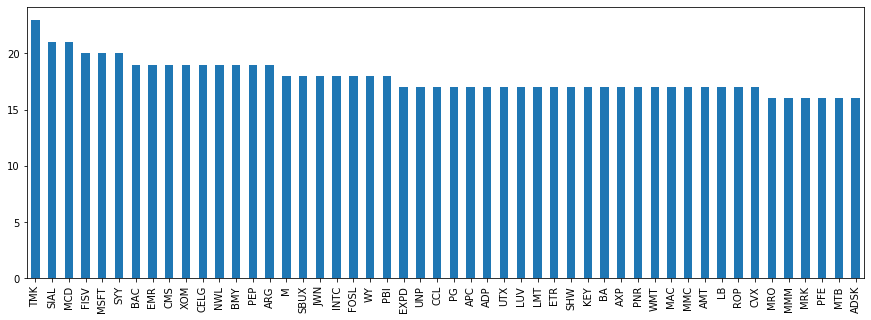

In [0]:
#let's convert our target column into categorical 

all_links['long_term_outlook'] = all_links['long_term_outlook'].astype('category')

#let's check the idstribution of the tickers in the data

all_links['ticker'].value_counts().nlargest(50).plot.bar(figsize=(15,5))

## Target variable Distribution

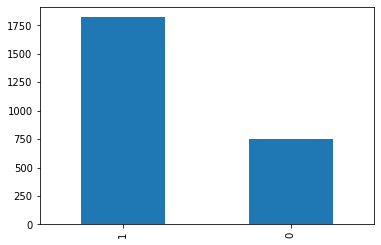

In [0]:
#let's check the distribution of the target varibale 

all_links['long_term_outlook'].value_counts().plot.bar()

In [6]:
#reading the dictionary & understanding about it 

dictionary = pd.read_csv("finance_word_dictionary.csv")
dictionary.head()

FileNotFoundError: [Errno 2] No such file or directory: 'finance_word_dictionary.csv'

In [0]:
# checking the shape of the dictionary 


print("The number of rows are {}." .format(dictionary.shape[0]))
print("The number of columns are {}." .format(dictionary.shape[1]))

The number of rows are 85221.
The number of columns are 19.


In [0]:
#count the no.of negative words 
print(dictionary.columns)

Index(['Word', 'Sequence Number', 'Word Count', 'Word Proportion',
       'Average Proportion', 'Std Dev', 'Doc Count', 'Negative', 'Positive',
       'Uncertainty', 'Litigious', 'Constraining', 'Superfluous',
       'Interesting', 'Modal', 'Irr_Verb', 'Harvard_IV', 'Syllables',
       'Source'],
      dtype='object')


In [0]:
#To pick the sentiments we can from the above columns in the following list 
sentiments = ['Negative','Positive','Uncertainty','Litigious','Constraining','Superfluous',
              'Interesting','Modal','Irr_Verb','Harvard_IV']

<div class="alert alert-block alert-info" align=center><b></b>
    
# Data extraction: 

In [0]:
%%time

all_links['link_text'] = ""

def find_between(s,start,end):
    return (s.split(start))[1].split(end)[0]

start = '<TYPE>10-K'
end = '</DOCUMENT>'
result=[]

for rownum, row in stock.iterrows():
    try:
        html = row['link']
        link = url.urlopen(html).read()
        link_data = link.decode('utf-8')
        result = find_between(link_data,start,end)
        soup = bs(result,'lxml')
        text =soup.find_all(text=True)
        blacklist = ['a','sequence','filename','description']
        output =""

    for t in text:
        
          if t.parent.name not in blacklist:
            output += '{}'.format(t)
      # print(output)
      
    
    except:
        pass
all_links['link_text'][rownum]=output

## hurrah we got the data :)

In [0]:
# Let's read the data 

final_data = pd.read_csv("complete_extracted_data.csv", usecols=('ticker','cik','filing_date','long_term_outlook','link_text'))

In [0]:
#let's read the top 5 rows of the data 

final_data.head()

ticker      cik filing_date  long_term_outlook  \
0     FE  1031296  28-02-2012                  0   
1     CL    21665  19-02-2015                  0   
2    PRU  1137774  19-02-2016                  1   
3   EBAY  1065088  28-03-2001                  1   
4    CAM   941548  25-02-2005                  1   

                                                                                                                                                                                                                                                                                                                                                                                                         link_text  
0  \nhtml PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd"\n Document created using WebFilings 1 \n Copyright 2008-2012 WebFilings LLC. All Rights Reserved \nFE-12.31.2011-10K\n UNITED STATES SECURITIES AND EXCHANGE COMMISSIONWASHINGTON, D. C. 20549 FORM 10-K(Mark One)þ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For th...  
1  \nhtml PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd"\n Document created using Wdesk 1 \n Copyright 2015 Workiva \nCL-12.31.2014-10K \nUNITED STATES SECURITIES AND EXCHANGE COMMISSIONWASHINGTON, D.C. 20549 FORM 10-K(Mark One)xANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934For the fiscal year ended December 31, 2014 or...  
2  \nhtml PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd"\n Document created using Wdesk 1 \n Copyright 2016 Workiva \n10-K\nTable of Contents UNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549__________________________________________ FORM 10-K(MARK ONE)ý ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934...  
3  \n   1\n\n- --------------------------------------------------------------------------------\n- --------------------------------------------------------------------------------\n\n                                 UNITED STATES\n                       SECURITIES AND EXCHANGE COMMISSION\n                             WASHINGTON, D.C. 20549\n                            ------------------------\n\n...  
4  \ne10vk\n PAGEBREAK \n\n\n \n \nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n\n\nForm 10-K\n\n\n\n\n\n\n\nþ \nANNUAL REPORT PURSUANT TO SECTION 13 or 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\n\nFor the Fiscal year ended December 31, 2004\nOR\n\n\n\n\n\n\n\n£ \nTRANSITION REPORT PURSUANT TO SECTION 13 or 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\n\n\nCommission File Nu...

In [0]:
#reading the top 5 columns 
final_data.columns

Index(['ticker', 'cik', 'filing_date', 'long_term_outlook', 'link_text'], dtype='object')

## Level-1 Cleaning 

1. Removing the contractions.
2. Removing the Accented character's.
3. Removing the scrub words.
4. Removing the url's like anchor links from the data. 

In [0]:
#creating a dictionary of contractions 

contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
#function for defining contraction's:

def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

#function for removing unicode data :

import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#function for removing all the scrub words
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text until space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [0]:
#using contractions dictionary to make corrections 
final_data['link_text'] = [expand_contractions(re.sub('’', "'", text)) for text in final_data['link_text']]

#stripping the words using space 
final_data['link_text'] = [text.strip().lower() for text in final_data['link_text']]

#removing accented characters 
final_data['link_text'] = [remove_accented_chars(text) for text in final_data['link_text']]

#re-placing " " " with space 
final_data['link_text'] = [text.replace('"', '') for text in final_data['link_text']]

# Removing url's from the text
url_reg  = r'[a-z]*[:.]+\S+'
final_data['link_text'] = [re.sub(url_reg, '', text) for text in final_data['link_text']]

final_data['link_text'] = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in final_data['link_text']]

#removing scrub_words
final_data['link_text'] = [scrub_words(text) for text in final_data['link_text']]

#replace spaaces more than one with single space 
final_data['link_text'] = [re.sub("\s+", ' ', text) for text in final_data['link_text']]

#finding the length of the words in the data
final_data['word_count'] = [len(text.split(' ')) for text in final_data['link_text']]

In [0]:
#checking the word_count of the cleaned data 
final_data['word_count'].describe()

count      2568.000000
mean      44547.902259
std       32992.178451
min        2967.000000
25%       21251.750000
50%       39899.000000
75%       58508.750000
max      241424.000000
Name: word_count, dtype: float64

In [0]:
#check the top 5 row's after cleaning the data 
final_data.head(2)

ticker      cik filing_date  long_term_outlook  \
0     FE  1031296  28-02-2012                  0   
1     CL    21665  19-02-2015                  0   

                                                                                                                                                                                                 link_text  \
0  html public w c dtd html transitional en document created using webfilings copyright webfilings llc all rights reserved fe united states securities and exchange commissionwashington form mark one ...   
1  html public w c dtd html transitional en document created using wdesk copyright workiva cl united states securities and exchange commissionwashington form mark one xannual report pursuant to secti...   

   word_count  
0      154051  
1       42755

In [0]:
#randomly checking the text data & make a list of stop words or un-necessary words from the data 
print(final_data['link_text'][2])

In [0]:
#list of stop words from the observations by reading some level-1 cleaned documents 

stopwords = ['dtd','copyright','llc','en','html','fe','ed','webfilings','e','vk','g','zip code', 'pagebreak','html' 
             'w','c','en','table','body','par','value','per','securities','exchange','comission','telephone','number',
             'zip', 'code', 'end', 'page','xbrl','begin','dc','aa','aaa', 'aaa aa','ab','abn','abn amro','abnormal',
             'abo','abs','ac','az','ba','baa','aoci','aol','apb','api','app','ann','anne','amp','amt','anda','bla','bit',
             'bio','bhc','bb','bbb','bbl','bbls','bc','bcf','bcfe','apr','arc','aro','asa','asa','asc','asic','asp','asr',
             'asu','asus','ave','bms','bnp','bny','boe','blvd','bms','boe','bps','bs','btu', 'btus','ca','cad','cal','ccc',
             'cceeff','cdo','cdos','cds','ce','cede','cg','chk','cmsa','col','com','con','conway','ct','dd','de','dan',
             'dana','dea','wti','wto','wv','wyeth','wyoming','xannual','xerox','xi','xii','xiii','xindicate','xiv','xix','xl',
             'xthe','xv','xvi','xvii','xviii', 'xx','xxi','xxx','wi','vt','vs','von''vie','via','vi','var','ta','tab','tam',
             'td','tdr','tdrs','te','sur','ss','sr','sq','sp','sop','sip','sd','sdn','se',
             '__________________________________________ '
            '__________ ']

In [0]:
def review_to_words(raw_review):
    
    remove = re.sub(r'\b\w{1,3}\b', '', raw_review) #removing all words less than 4 characters 
    letters_only = re.sub("[^a-zA-Z]", " ", remove) 
    word = letters_only.lower().split()
  
    meaningful_words = [w for w in word if not w in stopwords] 
    return( " ".join(meaningful_words))
 

In [0]:
no_of_rows = len(final_data)
print(no_of_rows)

# Initialize an empty list to hold the clean reviews
stopwords_text = []

# Loop over each review; create an index i that goes from 0 to the length of the movie review list 
for i in range(0, no_of_rows):
    stopwords_text.append(review_to_words(final_data['link_text'][i]))  
#   print("Done {}." .format(i))
data = stopwords_text
print("LEVEL_2 CLEANING IS DONE!!!")

2568
LEVEL_2 CLEANING IS DONE!!!


In [0]:
#now merging the new cleaned text data with the main data  
train_clean_data = pd.DataFrame(data= data, columns=['clean_text'])

train_data = pd.concat([final_data, train_clean_data],axis=1)

train_data.drop(columns=['link_text','word_count'], axis=1, inplace=True)

In [0]:
train_data.head()

ticker      cik filing_date  long_term_outlook  \
0     FE  1031296  28-02-2012                  0   
1     CL    21665  19-02-2015                  0   
2    PRU  1137774  19-02-2016                  1   
3   EBAY  1065088  28-03-2001                  1   
4    CAM   941548  25-02-2005                  1   

                                                                                                                                                                                                clean_text  
0  public transitional document created using rights reserved united states commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section...  
1  public transitional document created using wdesk workiva united states commissionwashington form mark report pursuant section fiscal year ended december transition report pursuant section transiti...  
2  public transitional document created using wdesk workiva contents united statessecurities commissionwashington form mark annual report pursuant section fiscal year ended december transition report...  
3  united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file ebay exact name registr...  
4  commission washington form annual report pursuant section fiscal year ended december transition report pursuant section commission file cooper cameron corporation exact name registrant specified c...

In [0]:
# splitting the date column into year by year 

#converting the column to datetime format 
train_data['filing_date'] = pd.to_datetime(train_data['filing_date'])

#splitting by year 
train_data['Date'] = train_data['filing_date'].dt.year

#dropping out the old filing date column 
train_data.drop(axis=1, inplace=True, columns='filing_date')

In [0]:
train_data.head()

ticker      cik  long_term_outlook  \
0     FE  1031296                  0   
1     CL    21665                  0   
2    PRU  1137774                  1   
3   EBAY  1065088                  1   
4    CAM   941548                  1   

                                                                                                                                                                                                clean_text  \
0  public transitional document created using rights reserved united states commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section...   
1  public transitional document created using wdesk workiva united states commissionwashington form mark report pursuant section fiscal year ended december transition report pursuant section transiti...   
2  public transitional document created using wdesk workiva contents united statessecurities commissionwashington form mark annual report pursuant section fiscal year ended december transition report...   
3  united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file ebay exact name registr...   
4  commission washington form annual report pursuant section fiscal year ended december transition report pursuant section commission file cooper cameron corporation exact name registrant specified c...   

   Date  
0  2012  
1  2015  
2  2016  
3  2001  
4  2005

In [0]:
#writing it into a csv file for next steps 

train_data.to_csv("train_data_phd_submission.csv", index=False, columns=['Date','clean_text','ticker', 'long_term_outlook'])

#same steps to be followed to the test data preprocessing

In [0]:
#read the saved train data file for NEXT steps in predicting the long_term outlook 

train_data = pd.read_csv("train_data_phd_submission.csv", usecols = ['Date','clean_text','ticker', 'long_term_outlook'])

In [0]:
train_data.head()

Date  \
0  2012   
1  2015   
2  2016   
3  2001   
4  2005   

                                                                                                                                                                                                clean_text  \
0  public transitional document created using rights reserved united states commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section...   
1  public transitional document created using wdesk workiva united states commissionwashington form mark report pursuant section fiscal year ended december transition report pursuant section transiti...   
2  public transitional document created using wdesk workiva contents united statessecurities commissionwashington form mark annual report pursuant section fiscal year ended december transition report...   
3  united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file ebay exact name registr...   
4  commission washington form annual report pursuant section fiscal year ended december transition report pursuant section commission file cooper cameron corporation exact name registrant specified c...   

  ticker  long_term_outlook  
0     FE                  0  
1     CL                  0  
2    PRU                  1  
3   EBAY                  1  
4    CAM                  1

<div class="alert alert-block alert-info" align=center><b></b>
    
## EDA ON TEXT DATA

In [0]:
#EDA using keras packages 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
MAX_NB_WORDS = 75000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)

tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 110363 unique tokens.


In [0]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 110363)

In [0]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[0]])

In [0]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 26883.3
max length: 149276


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);


**The average 10K is getting longer—about 42,000 words in 2013, up from roughly 30,000 words in 2000. By comparison, the text of the Sarbanes-Oxley Act of 2002 has 32,000 words.**


In [0]:
plt.hist([l for l in seq_lens if l < 50000], bins=50);

<div class="alert alert-block alert-info" align=center><b></b>
    
# NLP pieline

 <div class="alert alert-block alert-info" align=center><b></b>
    
    **The Intution**

In [1]:
#fetching the data from S3 Amazon server  

!wget https://3datasets.s3-ap-southeast-1.amazonaws.com/train_data_S3.csv  #train data 
!wget https://3datasets.s3-ap-southeast-1.amazonaws.com/test_data_cleaned.csv #test data 


--2019-10-18 07:17:21--  https://3datasets.s3-ap-southeast-1.amazonaws.com/train_data_S3.csv
Resolving 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)... 52.219.32.139
Connecting to 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)|52.219.32.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581464570 (555M) [text/csv]
Saving to: ‘train_data_S3.csv’

train_data_S3.csv   100%[===================>] 554.53M  8.36MB/s    in 69s     

2019-10-18 07:18:31 (8.04 MB/s) - ‘train_data_S3.csv’ saved [581464570/581464570]

--2019-10-18 07:18:34--  https://3datasets.s3-ap-southeast-1.amazonaws.com/test_data_cleaned.csv
Resolving 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)... 52.219.36.215
Connecting to 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)|52.219.36.215|:443... connected.
HTTP request sent, awaiting response...

In [12]:
# Load in the train and test datasets

train = pd.read_csv('/content/train_data_S3.csv', sep=',')
test = pd.read_csv('/content/test_data_cleaned.csv')
#reaading top 5 rows in the train data 
train.head(3)

long_term_outlook  ...                                                                                                                                                                                                                                                                                                                                                                                                       clean_text
0                  0  ...  public transitional document created using rights reserved united states commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section transition period commissionfile registrant state incorporation address employeridentification firstenergy corp ohio corporation south main street akron firstenergy solutions corp ohio corporation fi...
1                  0  ...  public transitional document created using wdesk workiva united states commissionwashington form mark report pursuant section fiscal year ended december transition report pursuant section transition period file exact name registrant specified charter delaware state jurisdiction incorporation organization employer identification park avenue york york address principal executive offices registra...
2                  1  ...  public transitional document created using wdesk workiva contents united statessecurities commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section transition period commission file prudential financial name registrant specified charter jersey state jurisdiction ofincorporation organization employeridentification broad streetnew...

[3 rows x 3 columns]

In [18]:
#reading the top 5 rows in the test data
test.rename(columns={'stop_words_removed':'clean_text'}, inplace=True)
test.head(2)


clean_text  ...  Date
0  form united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file general dynamics corporation exact name registrant specified charter delaware state other jurisdiction incorporation organization employer identification fairview park drive suite falls church virginia address principa...  ...  2012
1  united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section commission file bank corporation exact name registrant specified charter york state incorporation employer identification plaza buffalo york address principal executive offices registrant including area registered pursuant section common stock york stock title e...  ...  1999

[2 rows x 3 columns]

## we are going to write functions to extract the relevant features from the text extracted.

In [0]:
#Let's define functions for creating new columns 

# Generic stop wordss list from the mcdonald weblink\

stopWordsFile = '/content/stopwords_generic.txt'
with open(stopWordsFile ,'r') as stop_words:
    stopWords = stop_words.read().lower()
stopWordList = stopWords.split('\n')
stopWordList[-1:] = []
# Tokenizer
def tokenizer(text):
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = list(filter(lambda token: token not in stopWordList, tokens))
    return filtered_words

#===============================================================================
# Loading positive words
positiveWordsFile = '/content/positive_words.txt'
with open(positiveWordsFile,'r') as posfile:
    positivewords=posfile.read().lower()
positiveWordList=positivewords.split('\n')

# Calculating positive score 
def positive_score(text):
    numPosWords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in positiveWordList:
            numPosWords  += 1
    
    sumPos = numPosWords
    return sumPos
#===============================================================================
# Loading negative words
nagitiveWordsFile = '/content/negative_words.txt'
with open(nagitiveWordsFile ,'r') as negfile:
    negativeword=negfile.read().lower()
negativeWordList=negativeword.split('\n')


# Calculating Negative score
def negative_word(text):
    numNegWords=0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in negativeWordList:
            numNegWords -=1
    sumNeg = numNegWords 
    sumNeg = sumNeg * -1
    return sumNeg
#===============================================================================
# Loading litigous words
litigous = '/content/litiguous.txt'
with open(litigous ,'r') as litfile:
    litigousword=litfile.read().lower()
litigouswordlist =litigousword.split('\n')


# Calculating litigous score 
def litigous_score(text):
    numLitWords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in litigouswordlist:
            numLitWords  += 1
    
    sumLit = numLitWords
    return sumLit
#===============================================================================	
# Loading interesting words
interestingWordsfile = '/content/interestingwords.txt'
with open(interestingWordsfile ,'r') as intfile:
    interestingWord=intfile.read().lower()
interestingWordList=interestingWord.split('\n')


# Calculating interestingword score 
def interesting_score(text):
    numintwords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in interestingWordList:
            numintwords  += 1
    
    sumInt = numintwords
    return sumInt

#===============================================================================
# Loading superflous words
superflousfile = '/content/superfluous.txt'
with open(superflousfile ,'r') as supfile:
    supword=supfile.read().lower()
supWordList=supword.split('\n')


# Calculating sup_score 
def sup_score(text):
    numSupWords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in supWordList:
            numSupWords  += 1

         
    sumSup = numSupWords
    return sumSup
#===============================================================================
# Loading Modalstrong words
modalstrongfile = '/content/modal_strong.txt'
with open(modalstrongfile ,'r') as modfile:
    modstrongword=modfile.read().lower()
modstrongwordlist=modstrongword.split('\n')


# Calculating modal strongscore 
def modal_strong_store(text):
    nomodstr = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in modstrongwordlist:
            nomodstr  += 1
    
    summodstr = nomodstr
    return summodstr
#===============================================================================	
# Loading Modalneutral words
modalneutralfile = '/content/modal_neutral.txt'
with open(modalneutralfile ,'r') as modn:
    modneuword=modn.read().lower()
modneuwordlist=modneuword.split('\n')


# Calculating modal_neu_score
def modal_neutral_score(text):
    nomodneu = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in modneuwordlist:
            nomodneu  += 1
    
    summodneu = nomodneu
    return summodneu

#===============================================================================
# Loading modal_weak words
modal_weak_file = '/content/modal_weak.txt'
with open(modal_weak_file ,'r') as modweak:
    modweakword=modweak.read().lower()
modweaklist=modweakword.split('\n')


# Calculating mod_weak_score 
def mod_weak_score(text):
    nomodweak = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in modweaklist:
            nomodweak  += 1
    
    summodweak = nomodweak
    return summodweak
	
#===============================================================================
# Loading dictionary_countcount words
dictionary_wordfile = '/content/dictionary.txt'
with open(dictionary_wordfile ,'r') as dicfile:
    dicword=dicfile.read().lower()
dicwordlist=dicword.split('\n')


# Calculating dic_word_score score 
def dic_word_score(text):
    nodicwords = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in dicwordlist:
            nodicwords  += 1
    
    sumdic = nodickwords
    return sumdic
#===============================================================================

# Loading harvard_1 words
harvard_1_file = '/content/harvard_1.txt'
with open(harvard_1_file ,'r') as harfile:
    har_1_word=harfile.read().lower()
har_1_list=har_1_word.split('\n')


# Calculating dic_word_score score 
def har_1_score(text):
    nohar_1_words = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in har_1_list:
            nohar_1_words  += 1
    
    sumhar_1 = nohar_1_words
    return sumhar_1
#===============================================================================
# Calculating polarity score
def polarity_score(positiveScore, negativeScore):
    pol_score = (positiveScore - negativeScore) / ((positiveScore + negativeScore) + 0.000001)
    return pol_score

#===============================================================================
# Calculating Average sentence length 

'''# It will calculated using formula --- 
      Average Sentence Length = the number of words / the number of sentences'''
     
def average_sentence_length(text):
    sentence_list = sent_tokenize(text)
    tokens = tokenizer(text)
    totalWordCount = len(tokens)
    totalSentences = len(sentence_list)
    average_sent = 0
    if totalSentences != 0:
        average_sent = totalWordCount / totalSentences
    
    average_sent_length= average_sent
    
    return round(average_sent_length)
#===============================================================================
# Calculating percentage of complex words

''' It is calculated using Percentage of 
            Complex words = the number of complex words / the number of words''' 

def percentage_complex_word(text):
    tokens = tokenizer(text)
    complexWord = 0
    complex_word_percentage = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    if len(tokens) != 0:
        complex_word_percentage = complexWord/len(tokens)
    
    return complex_word_percentage
#===============================================================================

# calculating Fog Index 

'''# Fog index is calculated using --
    Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)'''

def fog_index(averageSentenceLength, percentageComplexWord):
    fogIndex = 0.4 * (averageSentenceLength + percentageComplexWord)
    return fogIndex

#===============================================================================
# Counting complex words
def complex_word_count(text):
    tokens = tokenizer(text)
    complexWord = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    return complexWord
#===============================================================================
#Counting total words

def total_word_count(text):
    tokens = tokenizer(text)
    return len(tokens)

#===============================================================================
# calculating uncertainty_score
uncertainty_dictionaryFile= '/content/uncertainity.txt'
with open(uncertainty_dictionaryFile ,'r') as uncertain_dict:
    uncertainDict=uncertain_dict.read().lower()
uncertainDictionary = uncertainDict.split('\n')

#uncertainity score 
def uncertainty_score(text):
    uncertainWordnum =0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in uncertainDictionary:
            uncertainWordnum +=1
    sumUncertainityScore = uncertainWordnum 
    
    return sumUncertainityScore
#===============================================================================
# calculating constraining score
constraining_dictionaryFile = '/content/constrained.txt'
with open(constraining_dictionaryFile ,'r') as constraining_dict:
    constrainDict=constraining_dict.read().lower()
constrainDictionary = constrainDict.split('\n')


def constraining_score(text):
    constrainWordnum =0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in constrainDictionary:
            constrainWordnum +=1
    sumConstrainScore = constrainWordnum 
    
    return sumConstrainScore
#===============================================================================
# Calculating positive word proportion
def positive_word_prop(positiveScore,wordcount):
    positive_word_proportion = 0
    if wordcount !=0:
        positive_word_proportion = positiveScore / wordcount
        
    return positive_word_proportion

#===============================================================================
# Calculating negative word proportion

def negative_word_prop(negativeScore,wordcount):
    negative_word_proportion = 0
    if wordcount !=0:
        negative_word_proportion = negativeScore / wordcount
        
    return negative_word_proportion
#===============================================================================
# Calculating uncertain word proportion
def uncertain_word_prop(uncertainScore,wordcount):
    uncertain_word_proportion = 0
    if wordcount !=0:
        uncertain_word_proportion = uncertainScore / wordcount
        
    return uncertain_word_proportion

#===============================================================================
# Calculating uncertain word proportion
def uncertain_word_prop(uncertainScore,wordcount):
    uncertain_word_proportion = 0
    if wordcount !=0:
        uncertain_word_proportion = uncertainScore / wordcount
        
    return uncertain_word_proportion

#===============================================================================
# Calculating constraining word proportion
def constraining_word_prop(constrainingScore,wordcount):
    constraining_word_proportion = 0
    if wordcount !=0:
        constraining_word_proportion = constrainingScore / wordcount
        
    return constraining_word_proportion
#===============================================================================
# calculating Constraining words for whole report
def constrain_word_whole(mdaText):
    wholeDoc = mdaText
    constrainWordnumWhole =0
    rawToken = tokenizer(wholeDoc)
    for word in rawToken:
        if word in constrainDictionary:
            constrainWordnumWhole +=1
    sumConstrainScoreWhole = constrainWordnumWhole 
    
    return sumConstrainScoreWhole
#===============================================================================
  

In [0]:
%%time
#create a column from the text by the no count's occoured in the data 

train['positive_score'] = train.clean_text.apply(positive_score)
test['positive_score'] = test.clean_text.apply(positive_score)

#applying it on the train & test data 
train['negative_score'] = train.clean_text.apply(negative_word)
test['negative_score'] = test.clean_text.apply(negative_word)

train['litigous_score'] = train.clean_text.apply(litigous_score)
test['litigous_score'] = test.clean_text.apply(litigous_score)

train['superflous_score'] = train.clean_text.apply(sup_score)
test['superflous_score'] = test.clean_text.apply(sup_score)


train['interesting_score'] = train.clean_text.apply(interesting_score)
test['interesting_score'] = test.clean_text.apply(interesting_score)


train['modal_strong'] = train.clean_text.apply(modal_strong_store)
test['modal_strong'] = test.clean_text.apply(modal_strong_store)


train['modal_weak'] = train.clean_text.apply(mod_weak_score)
test['modal_weak'] = test.clean_text.apply(mod_weak_score)


train['modal_neutral'] = train.clean_text.apply(modal_neutral_score)
test['modal_neutral'] = test.clean_text.apply(modal_neutral_score)

train['modal_neutral'] = train.clean_text.apply(modal_neutral_score)
test['modal_neutral'] = test.clean_text.apply(modal_neutral_score


train['harvard_1'] = train.clean_text.apply(har_1_score)
test['harvard_1'] = test.clean_text.apply(har_1_score)


train['polarity_score'] = np.vectorize(polarity_score)(train['positive_score'],train['negative_score'])
test['polarity_score'] = np.vectorize(polarity_score)(test['positive_score'],test['negative_score'])


train['avg_sen_length'] = train.clean_text.apply(average_sentence_length)
test['avg_sen_length'] = test.clean_text.apply(average_sentence_length)


train['complex_words_p'] = train.clean_text.apply(percentage_complex_word)
test['complex_eords_p'] = test.clean_text.apply(percentage_complex_word)


train['fog_index'] = np.vectorize(fog_index)(train['avg_sen_length'],train['complex_words_p'])
test['fog_index'] = np.vectorize(fog_index)(test['avg_sen_length'],test['complex_words_p']


train['complex_word_cou']= train.clean_text.apply(complex_word_count)
test['complex_word_cou']= test.clean_text.apply(complex_word_count)


train['word_count'] = train.clean_text.apply(total_word_count)
test['word_count'] = test.clean_text.apply(total_word_count)


train['uncertainty_scores']=train.clean_text.apply(uncertainty_score)
test['uncertainty_scores']=test.clean_text.apply(uncertainty_score)

train['constraining_scores'] = train.clean_text.apply(constraining_score)
test['constraining_scores'] = test.clean_text.apply(constraining_score)


train['positive_word_proportion'] = np.vectorize(positive_word_prop)(train['positive_score'],train['word_count'])
test['positive_word_proportion'] = np.vectorize(positive_word_prop)(test['positive_score'],test['word_count'])


train['negative_word_proportion'] = np.vectorize(negative_word_prop)(train['negative_score'],train['word_count'])
test['negative_word_proportion'] = np.vectorize(negative_word_prop)(test['negative_score'],test['word_count'])

train['uncertainty_word_proportion'] = np.vectorize(uncertain_word_prop)(train['uncertainty_scores'],train['word_count'])
test['uncertainty_word_proportion'] = np.vectorize(uncertain_word_prop)(test['uncertainty_scores'],test['word_count'])


train['constraining_word_proportion'] = np.vectorize(constraining_word_prop)(train['constraining_scores'],train['word_count'])
test['constraining_word_proportion'] = np.vectorize(constraining_word_prop)(test['constraining_scores'],test['word_count'])

In [0]:
#writing the new data into a csv file for the purpose

train.to_csv("train_cleaned_data_all_scores_16_oct_2019.csv.csv", index=False)
test.to_csv("test_cleaned_data_all_scores_16_oct_2019.csv", index=False)

In [0]:
## We're going to consider only the importaant columns after reading only the vectorzed data 

train_cols = ['long_term_outlook',	'Date',	'positive_score',	'negative_score',	'litigous_score',
          'superflous_score',	'interesting_score',	'modal_strong',	'modal_weak',	'modal_neutral','harvard_1',	
          'polarity_score','percentage_of_complex_words',	'fog_index'	,'complex_word_count',	'word_count',
          'uncertainty_score',	'constraining_score',	'positive_word_proportion','negative_word_proportion',
          'uncertainty_word_proportion',	'constraining_word_proportion']

test_cols = ['Date',	'positive_score',	'negative_score',	'litigous_score',
          'superflous_score',	'interesting_score',	'modal_strong',	'modal_weak',	'modal_neutral','harvard_1',	
          'polarity_score','percentage_of_complex_words',	'fog_index'	,'complex_word_count',	'word_count',
          'uncertainty_score',	'constraining_score',	'positive_word_proportion','negative_word_proportion',
          'uncertainty_word_proportion',	'constraining_word_proportion']

In [142]:
#reading the 
vector_train = pd.read_csv("/content/train_cleaned_data_all_scores_16_oct_2019.csv", 
                           usecols= train_cols)
vector_train.head()

long_term_outlook  ...  constraining_word_proportion
0                  0  ...                      0.012737
1                  0  ...                      0.008283
2                  1  ...                      0.010040
3                  1  ...                      0.009138
4                  1  ...                      0.003088

[5 rows x 22 columns]

In [143]:
vector_test = pd.read_csv("/content/test_cleaned_data_all_scores_16_oct_2019.csv", usecols=test_cols)
vector_test.head()

Date  ...  constraining_word_proportion
0  2012  ...                      0.009791
1  1999  ...                      0.007173
2  2001  ...                      0.012870
3  2009  ...                      0.012134
4  2004  ...                      0.007484

[5 rows x 21 columns]

In [38]:
print("Train data has {} rows, {} features.".format(vector_train.shape[0], vector_train.shape[1]))
print("Test data has {} rows, & {} features." .format(vector_test.shape[0], vector_test.shape[1]))

Train data has 2568 rows, 22 features.
Test data has 856 rows, & 21 features.


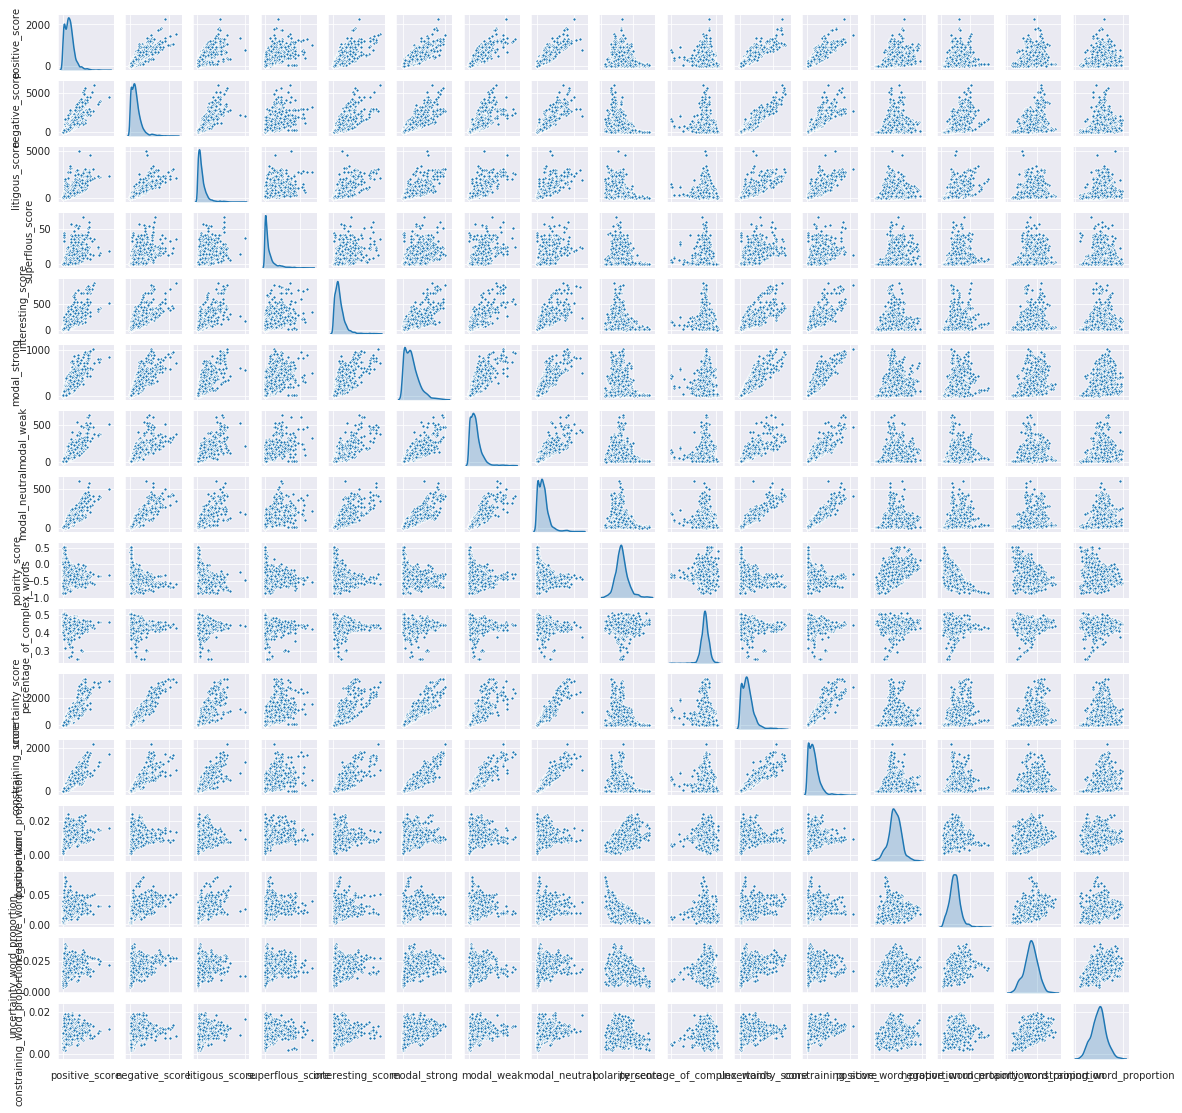

In [39]:
g = sns.pairplot(vector_train[[u'positive_score', u'negative_score', u'litigous_score', u'superflous_score', u'interesting_score',
                               u'modal_strong', u'modal_weak',u'modal_neutral', u'polarity_score',u'percentage_of_complex_words',
                               u'uncertainty_score',u'constraining_score',u'positive_word_proportion',u'negative_word_proportion',
                               u'uncertainty_word_proportion',u'constraining_word_proportion']],
                               palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [40]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(vector_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
#create alist of numerical attributes & categorical attributes
cat_attr = ['Date'] 
num_attr = ['positive_score', 'negative_score','litigous_score', 'superflous_score', 'interesting_score',
       'modal_strong', 'modal_weak', 'modal_neutral', 'harvard_1','polarity_score', 'percentage_of_complex_words', 
       'fog_index', 'complex_word_count','word_count', 'uncertainty_score', 'constraining_score','positive_word_proportion', 
       'negative_word_proportion','uncertainty_word_proportion', 'constraining_word_proportion']

In [144]:
#check the data types of the data
vector_train['long_term_outlook'] = vector_train['long_term_outlook'].astype("category")

vector_train['Date'] = vector_train['Date'].astype('category')
vector_test['Date'] = vector_test['Date'].astype('category')
print(vector_train.dtypes)

long_term_outlook               category
Date                            category
positive_score                     int64
negative_score                     int64
litigous_score                     int64
superflous_score                   int64
interesting_score                  int64
modal_strong                       int64
modal_weak                         int64
modal_neutral                      int64
harvard_1                          int64
polarity_score                   float64
percentage_of_complex_words      float64
fog_index                        float64
complex_word_count                 int64
word_count                         int64
uncertainty_score                  int64
constraining_score                 int64
positive_word_proportion         float64
negative_word_proportion         float64
uncertainty_word_proportion      float64
constraining_word_proportion     float64
dtype: object


In [0]:

#split the data into Dependent & Independent variables

y = vector_train['long_term_outlook']

del vector_train['long_term_outlook']

X = vector_train

In [146]:
#splitting into train & test data 

#to build a robust validation strategy we'll use the split ratio with some calculations

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1720, 21)
(848, 21)
(1720,)
(848,)


In [147]:
#min max scaling of the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #standardizing the data
scaler.fit(x_train[num_attr])

x_train[num_attr]=scaler.transform(x_train[num_attr])
x_test[num_attr]=scaler.transform(x_test[num_attr])

vector_test[num_attr] = scaler.transform(vector_test[num_attr])
print(x_train.shape)
print(x_test.shape)
print(vector_test.shape)

(1720, 21)
(848, 21)
(856, 21)


In [148]:
#one-hot encoding the categorical features 
x_train = pd.get_dummies(columns=cat_attr,data=x_train,drop_first=True)

x_test = pd.get_dummies(columns=cat_attr,data=x_test,drop_first=True)

#on test data 
vector_test= pd.get_dummies(data=vector_test, columns= cat_attr, drop_first=True)

print(x_train.shape)
print(x_test.shape)
print(vector_test.shape)

(1720, 43)
(848, 43)
(856, 43)


In [0]:
# Writing a function for plotting curves 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<div class="alert alert-block alert-info" align=center><b></b>
    
# Building models 

# Single Models

<div class="alert alert-block alert-info" align=center><b></b>
    
## Logistic Regression

In [109]:
#building the logistic regression learning model 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

#create an instance and fit the model 
logmodel = LogisticRegression()

#fit it on the train data 
logmodel.fit(x_train, y_train)

#making predictions on the train & validation 
log_train_pred = logmodel.predict(x_train)
log_test_pred = logmodel.predict(x_test)

# Prediction on the test data 
log_reg_prediction = logmodel.predict(vector_test)

print(classification_report(y_train, log_train_pred, digits=4))
print(classification_report(y_test, log_test_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7309    0.3640    0.4860       500
           1     0.7838    0.9451    0.8569      1220

    accuracy                         0.7762      1720
   macro avg     0.7574    0.6545    0.6715      1720
weighted avg     0.7684    0.7762    0.7491      1720

              precision    recall  f1-score   support

           0     0.6738    0.3846    0.4897       247
           1     0.7850    0.9235    0.8486       601

    accuracy                         0.7665       848
   macro avg     0.7294    0.6540    0.6692       848
weighted avg     0.7526    0.7665    0.7441       848



### Observations from Logistic Regression : 
  The mode is able to capture label '1', but not able to capture '0'. 

<div class="alert alert-block alert-info" align=center><b></b>
    
 ## Guassian NB: 


In [110]:
#building naive bayes model 
from sklearn.naive_bayes import GaussianNB

#instantiating a object
clf = GaussianNB()
#fit on train data 
clf.fit(x_train,y_train)

#make prediction on train & validation 
true_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

#making prediction on test data 

Naive_predictions = clf.predict(vector_test)

print(classification_report(y_train, true_pred, digits=5))
print(classification_report(y_test, test_pred, digits=5))

              precision    recall  f1-score   support

           0    0.49516   0.71600   0.58545       500
           1    0.85757   0.70082   0.77131      1220

    accuracy                        0.70523      1720
   macro avg    0.67637   0.70841   0.67838      1720
weighted avg    0.75222   0.70523   0.71728      1720

              precision    recall  f1-score   support

           0    0.48034   0.69231   0.56716       247
           1    0.84553   0.69218   0.76121       601

    accuracy                        0.69222       848
   macro avg    0.66293   0.69224   0.66419       848
weighted avg    0.73916   0.69222   0.70469       848



### Observation from Guassian NB: 
 This is able to capture both the labels, but let's see if any model can predict well..

<div class="alert alert-block alert-info" align=center><b></b>
    
## Learning curve

In [71]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
title ='GuassianNB'
estimator = GaussianNB()
plot_learning_curve(estimator, title, X,y, ylim=(0.10, 1.01), cv=cv, n_jobs=-1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

<div class="alert alert-block alert-info" align=center><b></b>

## SGD classifier:

In [116]:
#SGD

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", penalty="l2", max_iter=5, early_stopping=False,random_state=123)
clf.fit(x_train, y_train)

#predictions on Train & validation 
sgd_train = clf.predict(x_train)
sgd_validation = clf.predict(x_test)

#making prediction on the test data 
sgd_predictions = clf.predict(vector_test)

print('SGDClassifier')
print('F1_Macro: ' + str(classification_report(y_train,sgd_train)))
print('F1_Macro: ' + str(classification_report(y_test,sgd_validation)))

SGDClassifier
F1_Macro:               precision    recall  f1-score   support

           0       0.55      0.42      0.48       500
           1       0.78      0.86      0.82      1220

    accuracy                           0.73      1720
   macro avg       0.67      0.64      0.65      1720
weighted avg       0.72      0.73      0.72      1720

F1_Macro:               precision    recall  f1-score   support

           0       0.52      0.45      0.49       247
           1       0.79      0.83      0.81       601

    accuracy                           0.72       848
   macro avg       0.66      0.64      0.65       848
weighted avg       0.71      0.72      0.71       848



<div class="alert alert-block alert-info" align=center><b></b>
    
## SVM- Support vector machines

In [0]:
%%time
#support vector machines '
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(random_state=143)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

svm_grid = {"kernel":['linear','sigmoid', 'rbf','poly'],
            "C":[0.01,0.1,1,10],
            "gamma":['auto'],
            "degree":[0,1,2,3,4,5,6]
            }

svm = GridSearchCV(clf, param_grid=svm_grid, cv=kfold)

#Train the model using the training sets
svm.fit(x_train, y_train)

print(svm.best_params_)

#predicting on train & validation 
y_train_predictions = svm.predict(x_train)
y_test_predictions = svm.predict(x_test)

#Making prediction on the test data 
svm_predictions = svm.predict(vector_test)

print("Train Score: {} ." .format(classification_report(y_train, y_train_predictions)))
print("Validation Score: {} ." .format(classification_report(y_test, y_test_predictions)))

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
Train Score:               precision    recall  f1-score   support

           0       0.97      0.17      0.29       500
           1       0.75      1.00      0.85      1220

    accuracy                           0.76      1720
   macro avg       0.86      0.58      0.57      1720
weighted avg       0.81      0.76      0.69      1720
 .
Validation Score:               precision    recall  f1-score   support

           0       0.91      0.20      0.33       247
           1       0.75      0.99      0.85       601

    accuracy                           0.76       848
   macro avg       0.83      0.60      0.59       848
weighted avg       0.80      0.76      0.70       848
 .
CPU times: user 1min 26s, sys: 280 ms, total: 1min 26s
Wall time: 1min 26s


# Stage-1 -  Ensemble models

<div class="alert alert-block alert-info" align=center><b></b>

## Random Forest:   

In [72]:
#importing packages 
%%time

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" :[10,20,30,40,50],
              "criterion":['gini','entropy'],
              "max_depth" : [7,8,9,10], 
              "max_features" : [5,7,11,15,21],
              "oob_score" :[True]
              }

rf_grid = GridSearchCV(clf_rf, param_grid=param_grid, cv=kfold)

rf_grid.fit(x_train,y_train)

print(rf_grid.best_params_)

#predictions on train data & validation data 
train_pred_rf = rf_grid.predict(x_train)
test_pred_rf = rf_grid.predict(x_test)

#making predictions on test data 
rf_predictions = rf_grid.predict(vector_test)

print("Train Score: {} ." .format(classification_report(y_train, train_pred_rf)))
print("Validation Score: {} ." .format(classification_report(y_test, test_pred_rf)))

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'n_estimators': 20, 'oob_score': True}
Train Score:               precision    recall  f1-score   support

           0       0.99      0.20      0.34       500
           1       0.75      1.00      0.86      1220

    accuracy                           0.77      1720
   macro avg       0.87      0.60      0.60      1720
weighted avg       0.82      0.77      0.71      1720
 .
Validation Score:               precision    recall  f1-score   support

           0       0.89      0.21      0.34       247
           1       0.75      0.99      0.85       601

    accuracy                           0.76       848
   macro avg       0.82      0.60      0.60       848
weighted avg       0.79      0.76      0.70       848
 .
CPU times: user 3min 6s, sys: 34.7 ms, total: 3min 6s
Wall time: 3min 6s


## Stage-2- Boosting models

<div class="alert alert-block alert-info" align=center><b></b>

## XGBoosting- RF classifier

In [74]:

%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb = xgb.XGBRFClassifier()


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"n_estimators" : [75,100,150],
              "max_depth" : [5,6,7,8],
              "colsample_bytree":[0.7,0.8,0.4,0.5],
              "learning_rate": [0.10,.15,0.02,0.001,0.01,0.1],
              "subsample":[0.8,0.6,0.5],
              "objective" :['binary:logistic']}

xg_grid = GridSearchCV(xgb, param_grid=param_grid, n_jobs=-1, cv=kfold)


xg_grid.fit(x_train,y_train)

print(xg_grid.best_params_)

#making predictions on the train & validation data 
xgb_train_pred = xg_grid.predict(x_train)
xgb_test_pred = xg_grid.predict(x_test)

#making predictions on the test data 
xgb_predictions = xg_grid.predict(vector_test)

print("Train Score: {}." .format(classification_report(y_train, xgb_train_pred)))
print("Validation Score: {}." .format(classification_report(y_test, xgb_test_pred)))


{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75, 'objective': 'binary:logistic', 'subsample': 0.6}
Train Score:               precision    recall  f1-score   support

           0       0.97      0.18      0.30       500
           1       0.75      1.00      0.85      1220

    accuracy                           0.76      1720
   macro avg       0.86      0.59      0.58      1720
weighted avg       0.81      0.76      0.69      1720
.
Validation Score:               precision    recall  f1-score   support

           0       0.91      0.20      0.33       247
           1       0.75      0.99      0.85       601

    accuracy                           0.76       848
   macro avg       0.83      0.60      0.59       848
weighted avg       0.80      0.76      0.70       848
.
CPU times: user 27.4 s, sys: 47.7 s, total: 1min 15s
Wall time: 16min 18s


# Stage-3- Neural Networks

<div class="alert alert-block alert-info" align=center><b></b>

## Multi layer Perceptron 

In [76]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=143)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"activation" : ['relu','tanh','logistic'],
              "hidden_layer_sizes" : [(40,30,20,10), (20,20,20,20,20)],
              "max_iter":[30,40,50,100,150],
              "solver":['adam','sgd'],
              "learning_rate": ['adaptive', 'constant'],
              "batch_size" :[32,64, 128]
              }

mlp_grid = GridSearchCV(mlp, param_grid=param_grid, n_jobs=-1, cv=kfold)

#fit on the train data 
mlp_grid.fit(x_train,y_train)

#predicting on the train & validation 
mlp_train_pred = mlp_grid.predict(x_train)
mlp_val_pred = mlp_grid.predict(x_test)

#prediction on the Test data 
mlp_predictions = mlp_grid.predict(vector_test)

print('Neural Network')
print('Accuracy:' + str(classification_report(y_train,mlp_train_pred)))
print('Accuracy:' + str(classification_report(y_test,mlp_val_pred)))


Best parameters found:
 {'activation': 'logistic', 'batch_size': 64, 'hidden_layer_sizes': (40, 30, 20, 10), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}
Neural Network
Accuracy:               precision    recall  f1-score   support

           0       0.70      0.42      0.52       500
           1       0.80      0.93      0.86      1220

    accuracy                           0.78      1720
   macro avg       0.75      0.67      0.69      1720
weighted avg       0.77      0.78      0.76      1720

Accuracy:               precision    recall  f1-score   support

           0       0.63      0.43      0.51       247
           1       0.79      0.90      0.84       601

    accuracy                           0.76       848
   macro avg       0.71      0.66      0.67       848
weighted avg       0.74      0.76      0.74       848



### Observation: 
**It is able to capture both the classess wth good metric.**  

In [77]:
print('Best parameters found:\n', mlp_grid.best_params_)

Best parameters found:
 {'activation': 'logistic', 'batch_size': 64, 'hidden_layer_sizes': (40, 30, 20, 10), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


In [0]:
# lg_submission = pd.read_csv("/content/sample_submission.csv")

# lg_submission['long_term_outlook'] = log_reg_prediction

# lg_submission.to_csv("Log_reg_submission.csv", index=False)
# # sgd_submission['long_term_outlook'] = sgd_predictions

# # sgd_submission.to_csv("sgd_submission.csv", index=False)

# Stacking layer-1

In [0]:
s_train = np.column_stack(( log_train_pred, true_pred, sgd_train,xgb_train_pred, mlp_train_pred , train_pred_rf,y_train_predictions))
s_test = np.column_stack(( log_test_pred, test_pred, sgd_validation,xgb_test_pred, mlp_val_pred, test_pred_rf,y_test_predictions))

s_final = np.column_stack((log_reg_prediction,Naive_predictions,sgd_predictions, 
                           xgb_predictions,mlp_predictions,rf_predictions,svm_predictions))

## Logistic regression

In [113]:
#stacking using logistic regression 

log_reg = LogisticRegression(n_jobs=-1, random_state=123)

log_reg.fit(s_train, y_train)

stacking_train = log_reg.predict(s_train)
stacking_test = log_reg.predict(s_test)

stacking_logistic_test = log_reg.predict(s_final)
print('Stacking_Layer_1')
print('F1_Macro: ' + str(classification_report(y_train,stacking_train)))
print('F1_Macro: ' + str(classification_report(y_test,stacking_test)))


Stacking_Layer_1
F1_Macro:               precision    recall  f1-score   support

           0       0.76      0.38      0.51       500
           1       0.79      0.95      0.86      1220

    accuracy                           0.78      1720
   macro avg       0.77      0.67      0.68      1720
weighted avg       0.78      0.78      0.76      1720

F1_Macro:               precision    recall  f1-score   support

           0       0.67      0.37      0.48       247
           1       0.78      0.93      0.85       601

    accuracy                           0.76       848
   macro avg       0.73      0.65      0.66       848
weighted avg       0.75      0.76      0.74       848



## XGB-CLassifier

In [114]:
import xgboost as xgb
gbm = xgb.XGBClassifier(learning_rate = 0.02,
                        n_estimators= 400,
                        max_depth= 4,
                        min_child_weight= 2,
                        gamma=0.9,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread= -1,
                        scale_pos_weight=1)

gbm.fit(s_train, y_train)

gbm_stacking_train = gbm.predict(s_train)
gbm_stacking_validation = gbm.predict(s_test)

gbm_test_prediction = gbm.predict(s_final)

print('Stacking_Layer_GBM')
print('F1_Macro: ' + str(classification_report(y_train,gbm_stacking_train)))
print('F1_Macro: ' + str(classification_report(y_test,gbm_stacking_validation)))

Stacking_Layer_GBM
F1_Macro:               precision    recall  f1-score   support

           0       0.73      0.41      0.52       500
           1       0.79      0.94      0.86      1220

    accuracy                           0.78      1720
   macro avg       0.76      0.67      0.69      1720
weighted avg       0.78      0.78      0.76      1720

F1_Macro:               precision    recall  f1-score   support

           0       0.65      0.39      0.49       247
           1       0.79      0.91      0.84       601

    accuracy                           0.76       848
   macro avg       0.72      0.65      0.67       848
weighted avg       0.75      0.76      0.74       848



# Level-2 stacking

In [0]:
#level 2 
# combining the predictions of Logistic & XGB 
level_2_train = np.column_stack((stacking_train, gbm_stacking_train))
level_2_test = np.column_stack(( stacking_test,gbm_stacking_validation))

level_2_final = np.column_stack((stacking_logistic_test,gbm_test_prediction))

## Logistic Regression

In [0]:
log = LogisticRegression()
#fit on the train data 
log.fit(level_2_train,y_train)

# Best paramete set
print('Best parameters found:\n', mlp_grid.best_params_)
#predicting on the train & validation 
log_stacking_train = log.predict(level_2_train)
log_stacking_test = log.predict(level_2_test)

log_final_stacking = log.predict(level_2_final)

print('Neural Network')
print('Accuracy: ' + str(classification_report(y_train,log_stacking_train, digits= 4)))
print('Accuracy: ' + str(classification_report(y_test,log_stacking_test, digits=4)))


Best parameters found:
 {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (40, 30, 20, 10), 'learning_rate': 'adaptive', 'max_iter': 30, 'solver': 'adam'}
Neural Network
Accuracy:               precision    recall  f1-score   support

           0     0.7033    0.4220    0.5275       500
           1     0.7965    0.9270    0.8568      1220

    accuracy                         0.7802      1720
   macro avg     0.7499    0.6745    0.6922      1720
weighted avg     0.7694    0.7802    0.7611      1720

Accuracy:               precision    recall  f1-score   support

           0     0.6303    0.4211    0.5049       247
           1     0.7906    0.8985    0.8411       601

    accuracy                         0.7594       848
   macro avg     0.7105    0.6598    0.6730       848
weighted avg     0.7439    0.7594    0.7432       848



In [0]:
# all_stacking_submission = pd.read_csv("/content/sample_submission.csv")

# all_stacking_submission['long_term_outlook'] = mlp_final_stacking

# all_stacking_submission.to_csv("all_stacking_submission.csv", index=False)

<div class="alert alert-block alert-info" align=center><b></b>

## Feature Importmances using  Random Forest: 

[ 8 23 29 21 30 36 25 41 20 24 37 31 39 34 42 32 35 22  3 28 11 27 26  7
  5 12 18  0  4 13 15  6 16 40 10 14 17  1  2  9 38 19 33]
-----------------------------------------------------------------------
[33 19 38  9  2  1 17 14 10 40 16  6 15 13  4  0 18 12  5  7 26 27 11 28
  3 22 35 32 42 34 39 31 37 24 20 41 25 36 30 21 29 23  8]
------------------------------------------------------------------------


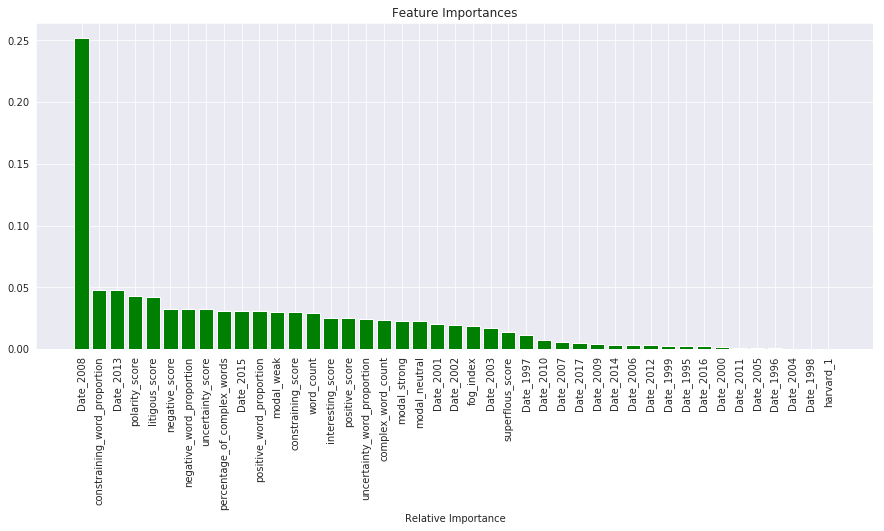

In [115]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth= 8, max_features= 5, n_estimators= 20,)

rfc.fit(x_train, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)
print(indices)
print('-----------------------------------------------------------------------')


indices1 = np.argsort(importances)[::-1]
print(indices1)
pd.DataFrame([x_train.columns[indices1],np.sort(importances)[::-1]])

print('------------------------------------------------------------------------')

features = x_train.columns
plt.figure(figsize=(15,6))
plt.title('Feature Importances')
plt.bar(range(len(indices1)),importances[indices1], color='g')
plt.xticks(range(len(indices1)), [features[i] for i in indices1[:50]], rotation=90)
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

1. **Year-2008 is an important feature where Recession happened in united states and it continued till the year 2013.**

<div class="alert alert-block alert-info" align=center><b></b>

# PCA 

In [0]:
#PCA

scaler = StandardScaler() #standardizing the data
scaler.fit(x_train[num_attr])

std_train =scaler.transform(x_train[num_attr])
std_test =scaler.transform(x_test[num_attr])

import matplotlib.pyplot as plt
%matplotlib inline

#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,6))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

# Models Without using Dictionary

In [120]:
#let's import the packages 

from termcolor import colored
import glob
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from time import time
from nltk import stem
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
%matplotlib inline

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [124]:
#reading files from amazon S3 server 

!wget https://3datasets.s3-ap-southeast-1.amazonaws.com/train_data_S3.csv
!wget https://3datasets.s3-ap-southeast-1.amazonaws.com/test_data_cleaned.csv

--2019-10-18 12:01:01--  https://3datasets.s3-ap-southeast-1.amazonaws.com/train_data_S3.csv
Resolving 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)... 52.219.124.23
Connecting to 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)|52.219.124.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581464570 (555M) [text/csv]
Saving to: ‘train_data_S3.csv.1’

train_data_S3.csv.1 100%[===================>] 554.53M  10.4MB/s    in 56s     

2019-10-18 12:01:58 (9.90 MB/s) - ‘train_data_S3.csv.1’ saved [581464570/581464570]

--2019-10-18 12:02:01--  https://3datasets.s3-ap-southeast-1.amazonaws.com/test_data_cleaned.csv
Resolving 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)... 52.219.32.103
Connecting to 3datasets.s3-ap-southeast-1.amazonaws.com (3datasets.s3-ap-southeast-1.amazonaws.com)|52.219.32.103|:443... connected.
HTTP request sent, awaiting respons

In [125]:
#reading the train data 

train_data = pd.read_csv("/content/train_data_S3.csv", usecols=['clean_text','long_term_outlook'])
train_data.head()

long_term_outlook                                                                                                                                                                                                                                                                                                                                                                                                       clean_text
0                  0  public transitional document created using rights reserved united states commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section transition period commissionfile registrant state incorporation address employeridentification firstenergy corp ohio corporation south main street akron firstenergy solutions corp ohio corporation fi...
1                  0  public transitional document created using wdesk workiva united states commissionwashington form mark report pursuant section fiscal year ended december transition report pursuant section transition period file exact name registrant specified charter delaware state jurisdiction incorporation organization employer identification park avenue york york address principal executive offices registra...
2                  1  public transitional document created using wdesk workiva contents united statessecurities commissionwashington form mark annual report pursuant section fiscal year ended december transition report pursuant section transition period commission file prudential financial name registrant specified charter jersey state jurisdiction ofincorporation organization employeridentification broad streetnew...
3                  1  united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period commission file ebay exact name registrant specified charter delaware state jurisdiction employer incorporation organization identification hamilton avenue jose california address principal executive offices registrant including area check whet...
4                  1  commission washington form annual report pursuant section fiscal year ended december transition report pursuant section commission file cooper cameron corporation exact name registrant specified charter head head delaware state jurisdiction incorporation organization employer identification west loop south suite houston texas address principal executive offices registrants including area regis...

In [126]:
#reading the test data 

test_data = pd.read_csv("/content/test_data_cleaned.csv",usecols=['stop_words_removed'])
test_data.head()

stop_words_removed
0  form united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file general dynamics corporation exact name registrant specified charter delaware state other jurisdiction incorporation organization employer identification fairview park drive suite falls church virginia address principa...
1  united states commission washington form annual report pursuant section fiscal year ended december transition report pursuant section commission file bank corporation exact name registrant specified charter york state incorporation employer identification plaza buffalo york address principal executive offices registrant including area registered pursuant section common stock york stock title e...
2  range resources corporation form contents commission washington link form form mark annual report pursuant section fiscal year ended december transition report pursuant section required transaction period from commission file range resources corporation exact name registrant specified charter delaware state incorporation main street suite fort worth texas address principal executive offices em...
3  united states commission washington form mark annual report pursuant section fiscal year ended december transition report pursuant section transition period from commission file laboratory corporation america holdings exact name registrant specified charter delaware state other jurisdiction incorporation organization employer identification south main street burlington north carolina address p...
4  united states commission washington form mark annual report pursuant section fiscal year ended july transition report pursuant section commission file sysco corporation exact name registrant specified charter delaware state other jurisdiction employer incorporation organization identification enclave parkway houston texas address principal executive offices registrant including area registered...

In [0]:
#splitting the data into train & validation 

y = train_data['long_term_outlook']

X= train_data['clean_text']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=123)

In [128]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1720,)
(848,)
(1720,)
(848,)


<div class="alert alert-block alert-info" align=center><b></b>

## SVM with count vectorizer

In [129]:
svm_C = make_pipeline(
    CountVectorizer(ngram_range=(1,2)),
    SGDClassifier(loss='hinge', penalty='l2', alpha=0.001,max_iter=50, random_state=42), )

svm_C.fit(x_train, y_train)
svm_prediction = svm_C.predict(x_train)
SVM_score_train = f1_score(y_train, svm_C.predict(x_train), average='macro')
SVM_score_test = f1_score(y_test, svm_C.predict(x_test), average='macro')
print('SVM_score_f1(test):{}, SVM_score_f1(train):{}'.format(SVM_score_test, SVM_score_train))

SVM_score_f1(test):0.5031142723297468, SVM_score_f1(train):0.7382305194805194


<div class="alert alert-block alert-info" align=center><b></b>

## CountVectorizer with LR

In [130]:


lr1 = make_pipeline(CountVectorizer(ngram_range=(1,2)), LogisticRegression(), ).fit(x_train,y_train)

lr1_prediction = lr1.predict(x_test)

lr1_score_train = f1_score(y_train, lr1.predict(x_train), average='macro')

lr1_score_test = f1_score(y_test, lr1.predict(x_test), average='macro')

print('lr1_score_f1(test):{} --- lr1_score_f1(train):{}'.format(lr1_score_test, lr1_score_train))

lr1_score_f1(test):0.5363129043019603 --- lr1_score_f1(train):0.8613211401050662


<div class="alert alert-block alert-info" align=center><b></b>

## CountVectorizer + TFIDF with LR

In [131]:


cv = Pipeline([('cv', CountVectorizer(ngram_range=(1,2)))])
# All together
feats =  FeatureUnion([('cv', cv),('tfidf', TfidfVectorizer(ngram_range=(1, 2)))])

lr2 = make_pipeline(feats, LogisticRegression(), ).fit(x_train, y_train)

lr2_prediction= lr2.predict(x_test)

lr2_score_train = f1_score(y_train, lr2.predict(x_train), average='macro')

lr2_score_test = f1_score(y_test, lr2.predict(x_test), average='macro')

print('lr_score_f1(test):{} --- lr_score_f1(train):{}'.format(lr2_score_test, lr2_score_train))

lr_score_f1(test):0.5264336631864936 --- lr_score_f1(train):0.8667535742525592


## Stemming
Preprocessing the posts with stop word removal and then porter stemming improved the F1 macro scores of both logistic regression and XGBoost classifiers.

In [0]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
stemmer = stem.PorterStemmer()
def porter_stem(sentence):
    stemmed_sequence = [stemmer.stem(word) for word in tokenizer.tokenize(sentence)]
    return ' '.join(stemmed_sequence)
stemmed_train = [porter_stem(post) for post in x_train]
stemmed_test = [porter_stem(post) for post in x_test]

<div class="alert alert-block alert-info" align=center><b></b>

## LDA+TFIDF with Logistic regression using Porter stemming

In [133]:

lda = Pipeline([('tf', CountVectorizer()), ])

lda_tfidf_features =  FeatureUnion([('lda', lda),
                                    ('tfidf', TfidfVectorizer(strip_accents='unicode', min_df=4))])

stem_lr_model = make_pipeline(lda_tfidf_features, LogisticRegression(C=1.5, penalty='l1', random_state=0)
                             ).fit(stemmed_train, y_train)

stem_lr_prediction = stem_lr_model.predict(stemmed_test)

print('training score:', f1_score(y_train, stem_lr_model.predict(stemmed_train), average='macro'))

stem_lr_macro_f1 = f1_score(y_test, stem_lr_prediction, average='macro')

print('testing score:', stem_lr_macro_f1)

training score: 1.0
testing score: 0.5529306559357211


<div class="alert alert-block alert-info" align=center><b></b>

## Majority Voting Ensembling
The results of the above classifiers are ensembled via a simple majority voting scheme. In case of no majority, the prediction of the logistic regression without stemming (i.e. the classifier with the highest macro F1 score) is picked.

In [136]:
def majority_element(a):
    c = Counter(a)
    value, count = c.most_common()[0]
    if count > 1:
        return value
    else:
        return a[1]
        
merged_predictions = [[s[0],s[1]] for s in zip(stem_lr_prediction, lr2_prediction)]
majority_prediction = [majority_element(p) for p in merged_predictions]
print('majority vote ensemble:', f1_score(y_test, majority_prediction, average='macro')) 
print(classification_report(y_test, majority_prediction))

majority vote ensemble: 0.5264336631864936
              precision    recall  f1-score   support

           0       0.36      0.22      0.28       247
           1       0.72      0.84      0.78       601

    accuracy                           0.66       848
   macro avg       0.54      0.53      0.53       848
weighted avg       0.62      0.66      0.63       848



## Other Models tried: 

**1. Convolution1D using CNN for text classification.**
Acheived accuracy of 70% on both train & validation. 

**2. LSTM.**

## Further Researches to be done: 

0. Data Needs to be further cleaned in a fine way for acheiving better predictions.

1. Scrpaing the entire data with different sections of the 10-K reports and analysing individually on the long term outlook.
2. Cleaning the data and building the advanced models using glove and other techniques.


# Research & References & Challenges: 

1. The starting point of this project is the data extraction. I have read many papers for understanding where to start, but this one research paper helped me!. 

[Annual Report Algotithm for the 10-K filing using regular expressions](https://www.ssrn.com/abstract=2870309). 

2. Using dictionary- This reference is taken from where people developed packages to extract the sentiments, 

[Sentiment understanding](https://cran.r-project.org/web/packages/edgar/edgar.pdfhttps://). 

3. I had  Limitation of computer hardware resourses to use the advanced techiques for buiding better models. 

[RMDL- Random Multimodel Deep Learning for Classification](https://https://github.com/kk7nc/RMDL). 

# Thanking Goolge Colab, Github , Amazon S3 services for all the resources. 